# Data Description and Exploratory Data Analysis and Visualization

## Library Imports

In [1]:
library(tidyverse)
library(repr)
library(ggplot2)
library(readr)
library(broom)

options(repr.plot.width = 20, repr.plot.height = 10) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Downloading the Dataset and reading it
Go to https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023 and download the dataset and add it to the data directory of the project.
<br>
Use the read_csv method to read the data and let us look at the top 50 examples from the data.

In [2]:
data <- read_csv("data/university_rankings.csv", show_col_types = FALSE)
data_top_50 <- head(data, 50)
data_top_50

University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20965,10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6
7,Princeton University,United States,8279,8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
8,"University of California, Berkeley",United States,40921,18.4,24%,52 : 48,92.1,86.4,95.8,99.0,76.8,78.4
9,Yale University,United States,13482,5.9,21%,52 : 48,91.4,92.6,92.7,97.0,55.0,70.9


## Data Description

The World University Rankings 2023 dataset covers 1,799 universities from 104 countries, based on 13 performance indicators across four areas: teaching, research, knowledge transfer, and international outlook. It includes over 121 million citations from 15.5 million research publications and survey responses from 40,000 scholars, totaling over 680,000 data points from more than 2,500 institutions.
<br>
There are a total of 2341 total observations along with 13 columns. Most of the variables are of type "chr" other than the number of students and number of students per staff which are of type "dbl".

|| Column Name | Column Type | Column Description |
|---| ------------|-------------|--------------------|
| 1 | University Rank | chr | Rank of specific university all over the world |
| 2 | Name of University | chr | Specific name of university |
| 3 | Location | chr | Place where university exists |
| 4 | No of student | dbl | Present students enrolled in university |
| 5 | No of student per staff | dbl | Students under 1 Professor |
| 6 | International Student | chr | Total number of International Students |
| 7 | Female:Male Ratio | chr | Number of female and male ratio respectively |
| 8 | OverAll Score | chr | Overall score out of 100 |
| 9 | Teaching Score | chr | Teaching score out of 100 |
| 10 | Research Score | chr | Research score out of 100 |
| 11 | Citations Score | chr | Number of citations received by a journal in one year to documents published in the three previous years, divided by the number of documents indexed in Scopus published in those same three years out of 100 |
| 12 | Industry Income Score | chr | Money a university receives from the working industry in exchange for its academic expertise out of 100 |
| 13 | International Outlook Score | chr | Ability of a university to attract undergraduates, postgraduates and faculty from all over the planet |

## Question 

<b>How does the overall university score change with the university rank, its location, and the international student percentage?</b>
<br>
<br>
The response variable here is OverAll Score and the input variables are University Rank, Location, and International Student.
<br>
<br>
The data will help us answer the research question in the following manner:
<br>
- Overall Score: This is a quantitative measure of each university’s performance and is the response variable.
- University Rank: Rank is a clear indicator of relative performance. By analyzing the relationship between rank and overall score, we can observe different patterns.
- Location: Universities from different locations may show varied performance. We can explore if certain countries perform better than others on average.
- International Student: This variable can be used to gain information about the international presence at each university. Higher percentages of international students may correlate with higher scores, suggesting that high score institutions attract more international students.
<br>
<br>
This question is focused on inference as we are trying to understand the relationship between the response variable and one or more explanatory variables.

## Cleaning and Tidying the Data
If we look at the rankings, we observe that after rank 70, some universities have the same ranks which suggests to me that ranks are being shared after rank 70. So I chose to work with the first 70 ranks of the dataset to avoid facing the problem of distinguishing between universities of the same rank.
<br>
I also selected the columns that would be required for our analysis. This includes 4 columns. I have also renamed the columns for better readability and understanding.

In [3]:
tidy_data <- data %>% select("OverAll Score", "University Rank", "Location", "International Student") %>% na.omit(tidy_data)

colnames(tidy_data) <- c("Overall Score", "Rank", "Location", "International Student Percentage")
tidy_data <- head(tidy_data, 70)
tidy_data

Overall Score,Rank,Location,International Student Percentage
<chr>,<chr>,<chr>,<chr>
96.4,1,United Kingdom,42%
95.2,2,United States,25%
94.8,3,United Kingdom,39%
94.8,3,United States,24%
94.2,5,United States,33%
94.1,6,United States,34%
92.4,7,United States,23%
92.1,8,United States,24%
91.4,9,United States,21%


## Visualizations

The first visualization we have here is the scatter plot of Rank versus Overall Score. 
<br>
The X-axis has the ranks whereas the Y-axis has the overall score and the points are colored by countries.
<br>
This plot allows us to see the relationship between university rank and overall score and how different locations and international student percentages influence that relationship. By sizing the data points as per the international student percentage, we can see which ranks have a higher percentage of students and how they relate to the overall scores. A scatter plot will also immediately show whether there is a linear, exponential, or another pattern. Higher-ranked universities are expected to have higher scores, but this plot will also reveal outliers that break these trends.
<br>
By coloring the data points by Location, we can assess whether universities from certain countries perform better or worse than others. For example, universities from the United States or the United Kingdom have higher ranks.

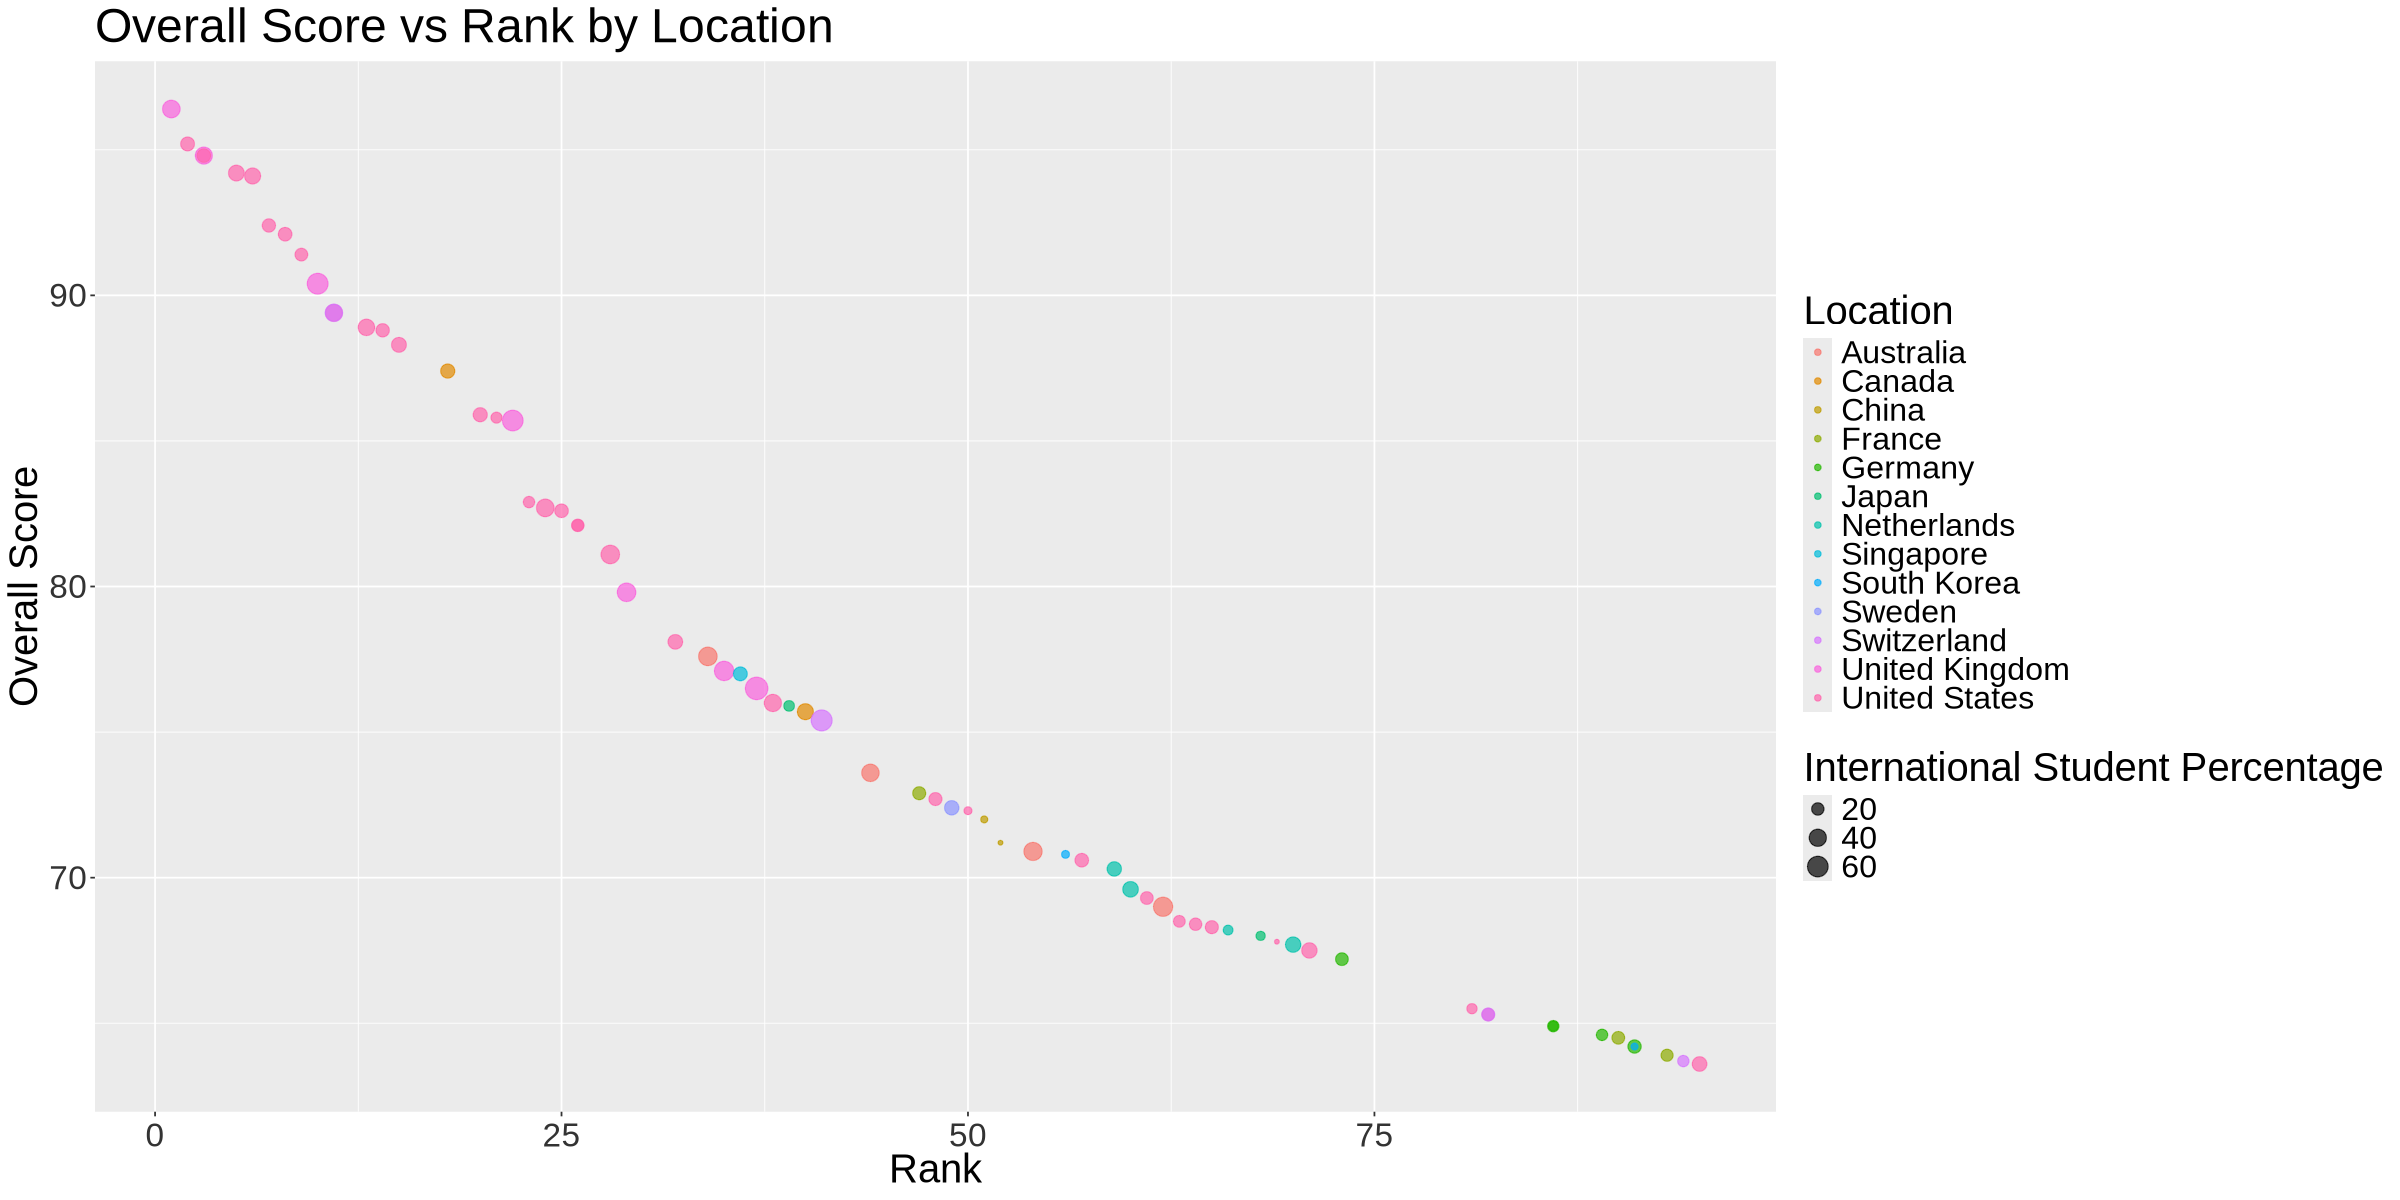

In [4]:
tidy_data$Rank <- as.numeric(tidy_data$Rank)
tidy_data$`Overall Score` <- as.numeric(tidy_data$`Overall Score`)
tidy_data$`International Student Percentage` <- as.numeric(gsub("%", "", tidy_data$`International Student Percentage`))

ggplot(tidy_data, aes(x = Rank, y = `Overall Score`, color = Location, size = `International Student Percentage`)) +
  geom_point(alpha = 0.7) +
  labs(title = "Overall Score vs Rank by Location",
       x = "Rank",
       y = "Overall Score",
       color = "Location") +
  theme(text = element_text(size = 24), axis.text.x = element_text(color = "grey20", size = 20, hjust = .5, vjust = .5, face = "plain"), axis.text.y = element_text(color = "grey20", size = 20, hjust = .5, vjust = .5, face = "plain"))

The second visualization here is the boxplots of overall scores by location. 
<br>
The X-axis has the locations whereas the Y-axis has the overall scores and we color the plots by location.
<br>
Box plots are useful for comparing distributions of a continuous variable across different categorical groups. Here we have those exact features that we want to visualize, hence the boxplot is helpful. This is particularly useful for understanding how universities from different regions perform on average and how varied the scores are within each region.
<br>
This plot allows for a comparison between locations. It helps answer whether universities from a particular location tend to perform better or worse in terms of the overall score.

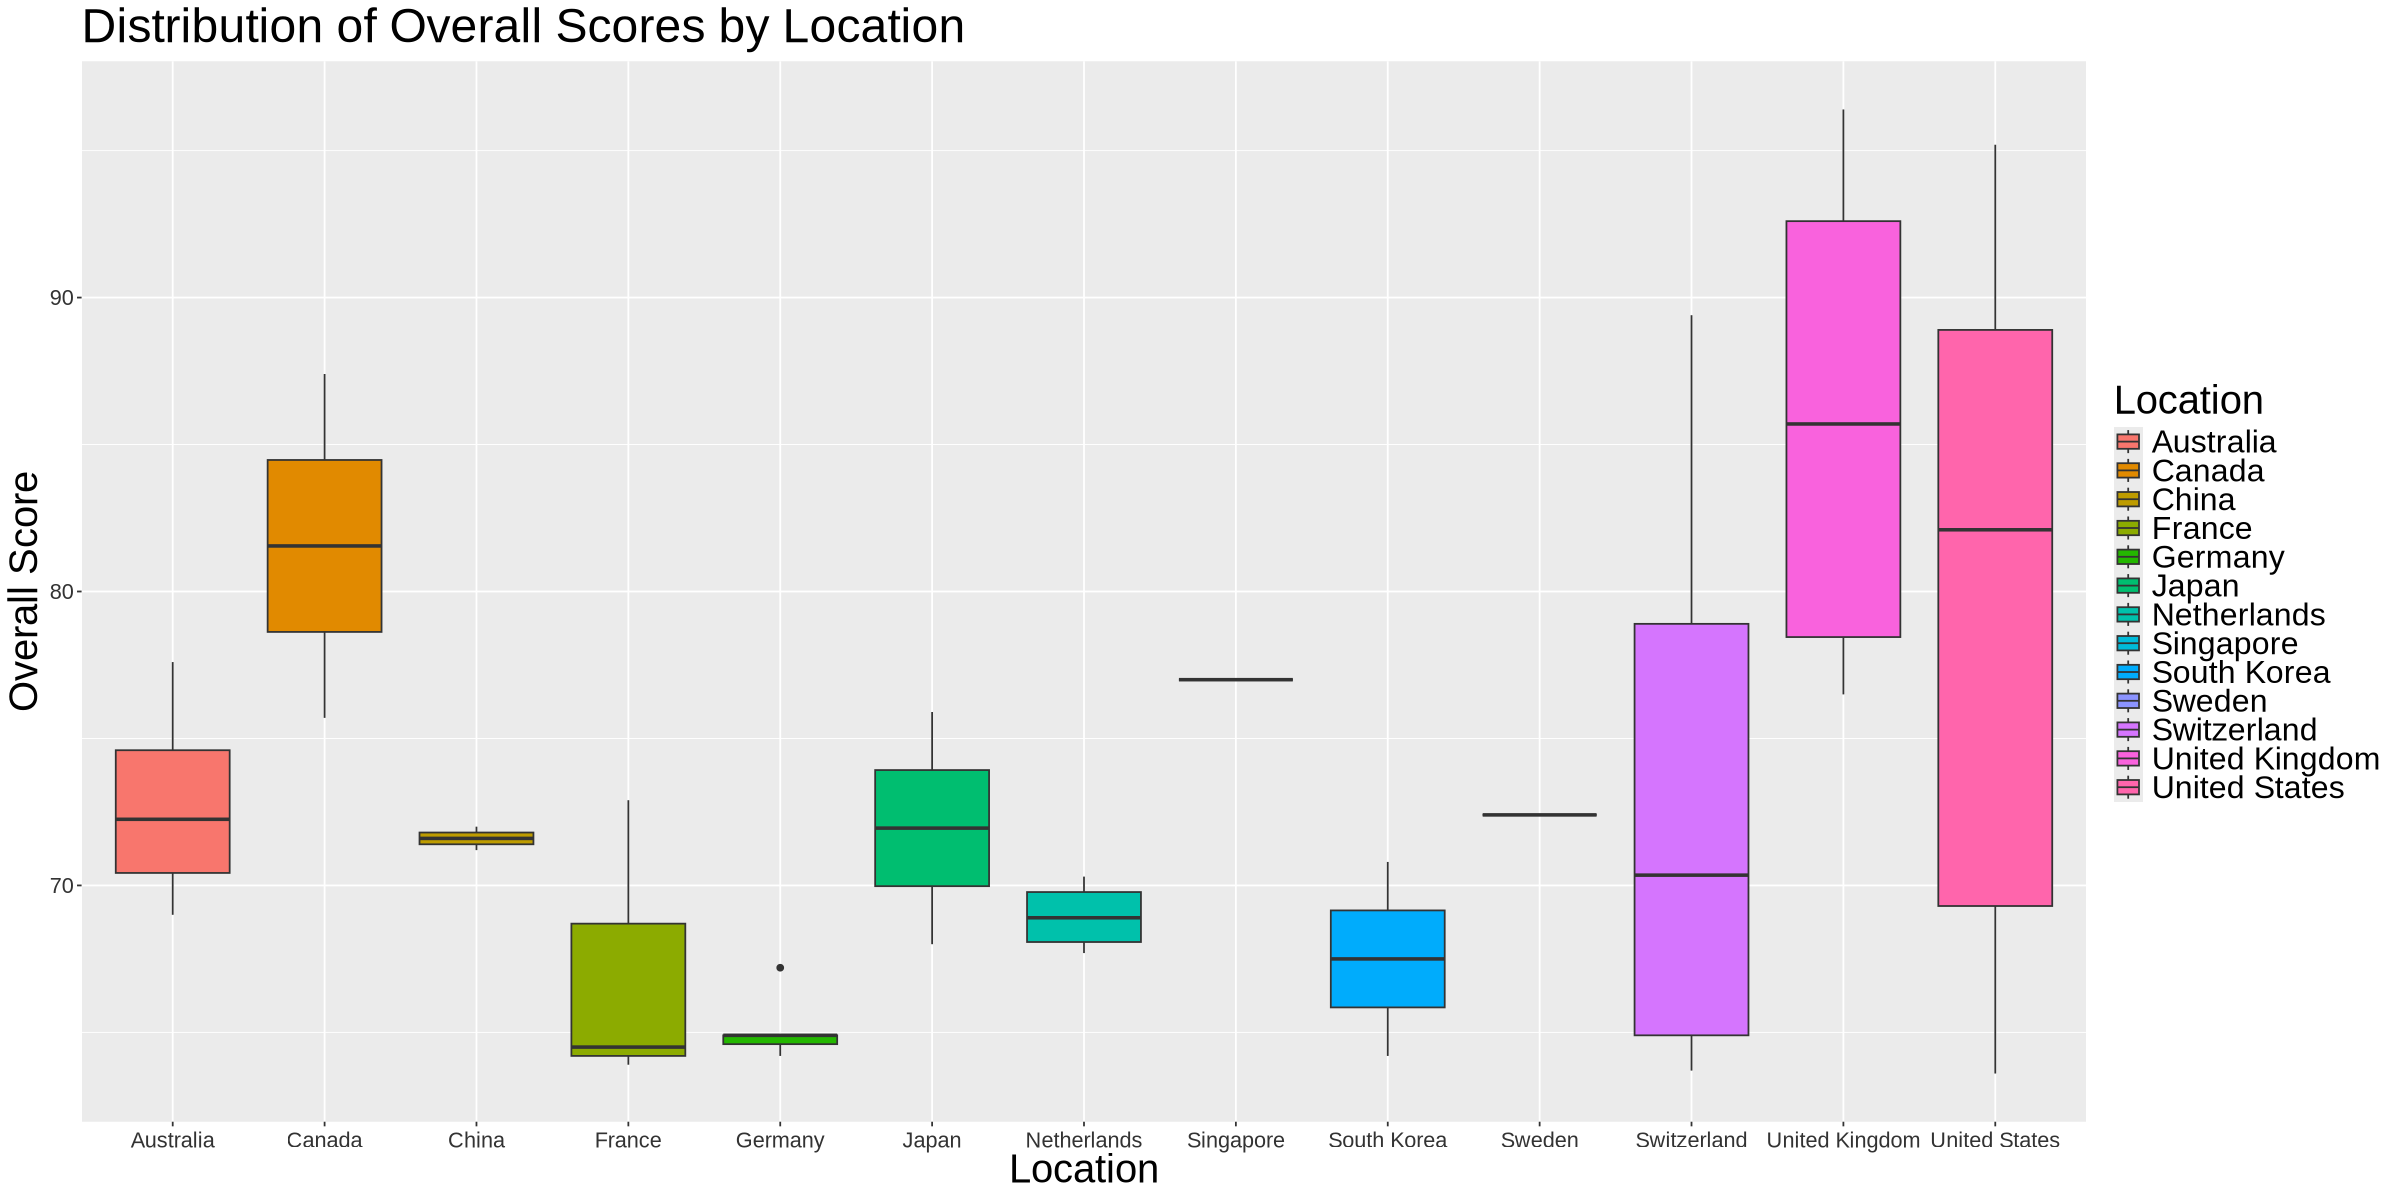

In [5]:
ggplot(tidy_data, aes(x = Location, y = `Overall Score`, fill = Location)) +
  geom_boxplot() +
  labs(title = "Distribution of Overall Scores by Location",
       x = "Location",
       y = "Overall Score") +
  theme(text = element_text(size = 24), axis.text.x = element_text(color = "grey20", size = 13, hjust = .5, vjust = .5, face = "plain"), axis.text.y = element_text(color = "grey20", size = 13, hjust = .5, vjust = .5, face = "plain"))

The third visualization here is the bar graph of International Student Percentage by Rank.
<br>
The X-axis has the ranks, and the Y-axis has the international student percentages. We color the bars by country.
<br>
Bar plots are effective at showing the size of a variable across categories. Here, we get insights into whether international diversity contributes to higher university rankings, which also helps us understand if there is any multicollinearity in the variables. We use this visualization to explore how the International Student Percentage varies with Rank. If top universities have higher international student percentages, this may suggest that a diverse student body is one of the factors contributing to higher rankings and scores.

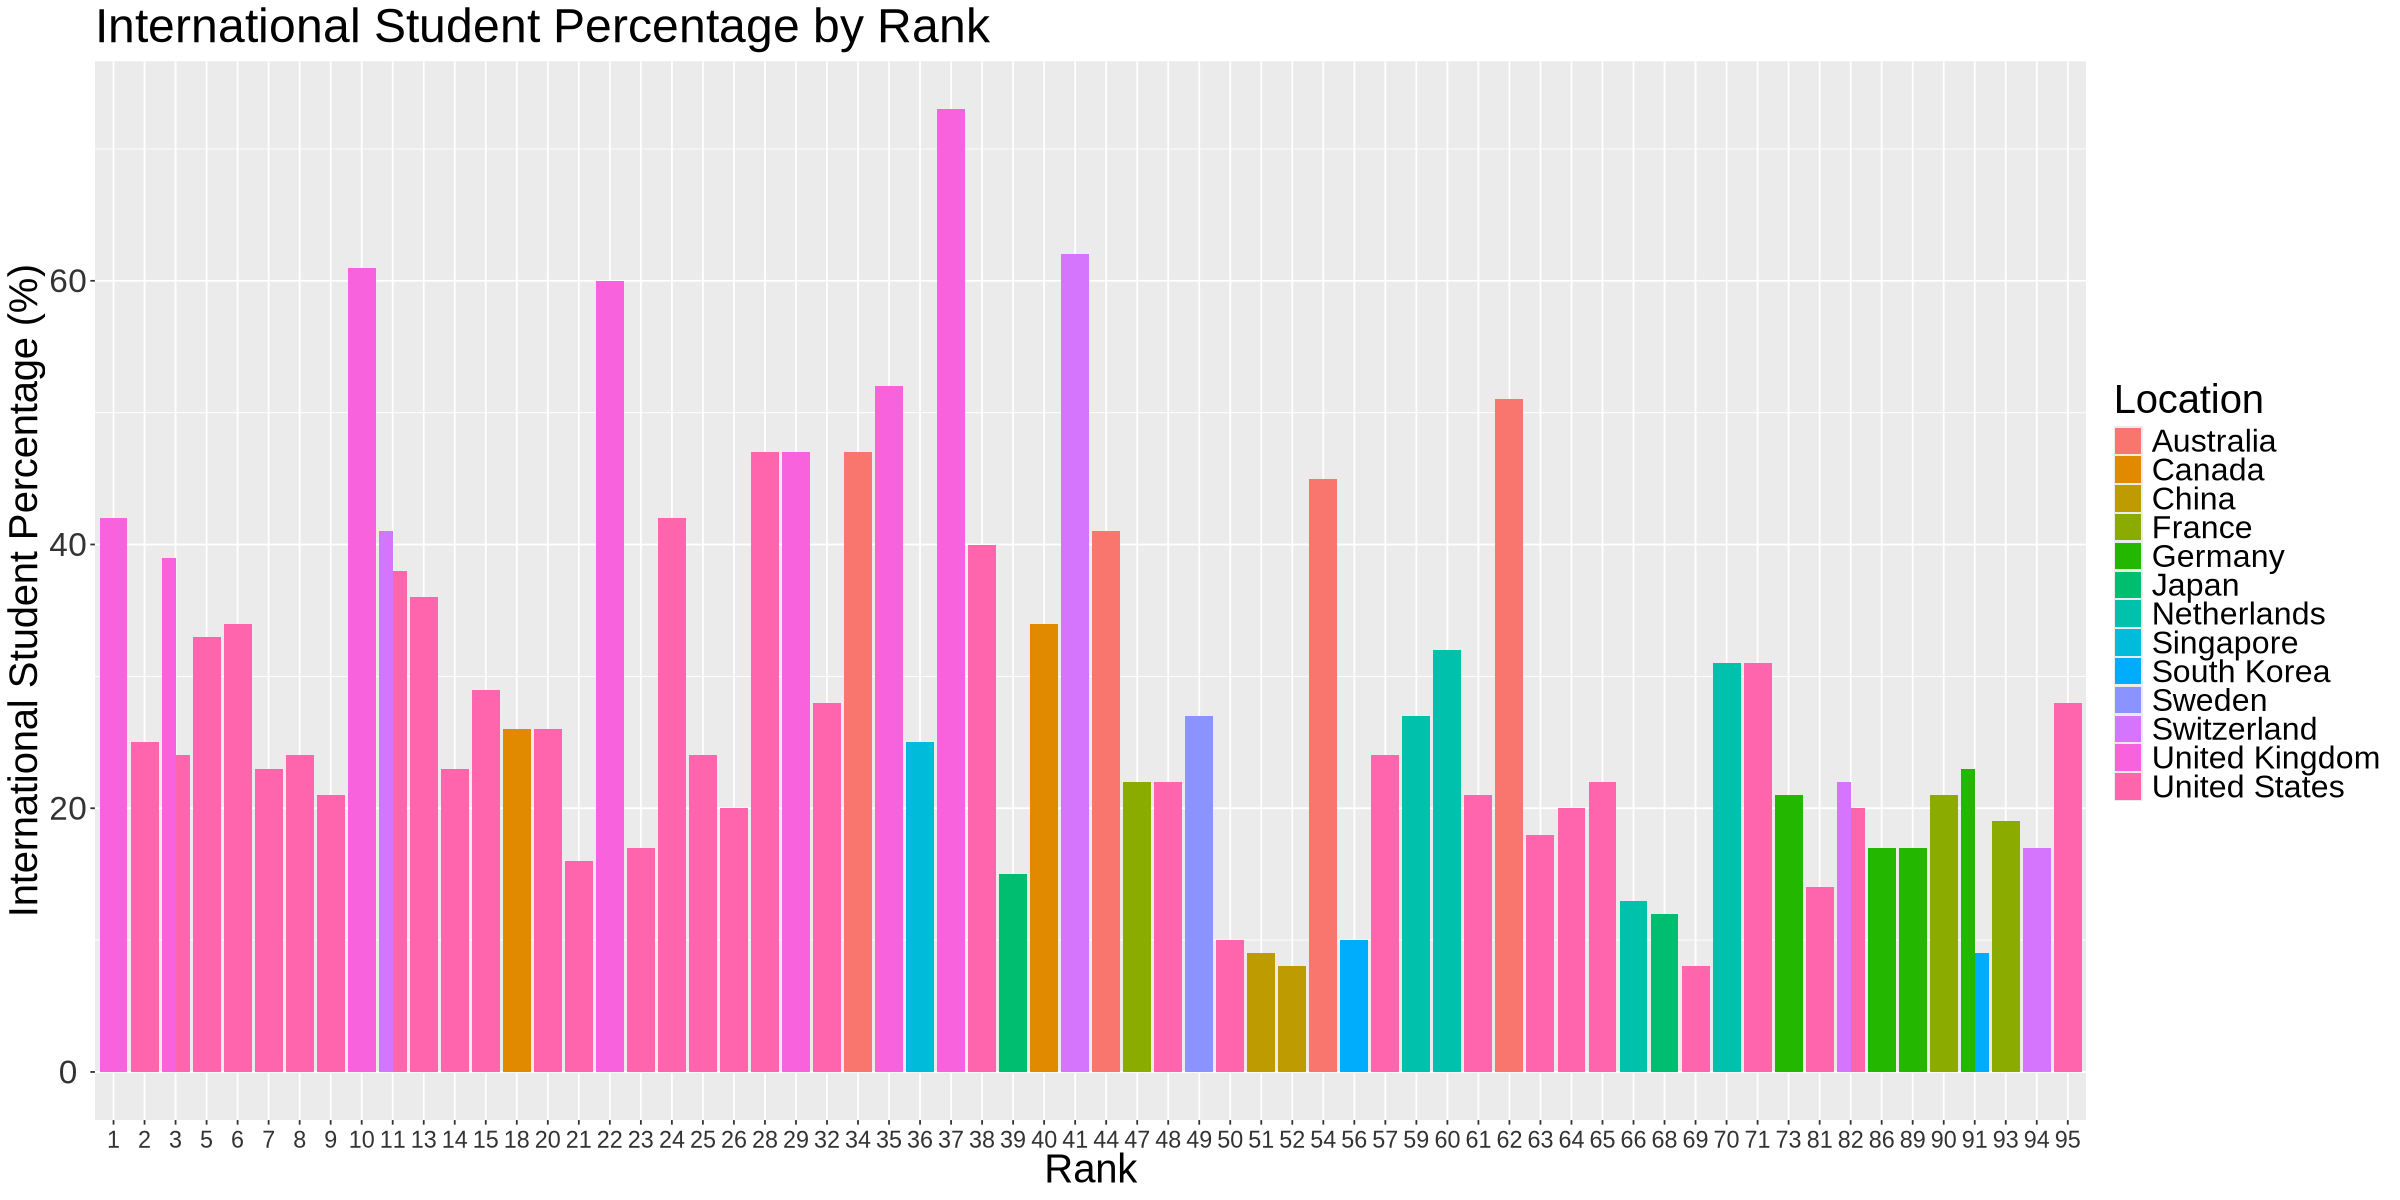

In [6]:
ggplot(tidy_data, aes(x = as.factor(Rank), y = `International Student Percentage`, fill = Location)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "International Student Percentage by Rank",
       x = "Rank",
       y = "International Student Percentage (%)",
       fill = "Location") +
  theme(text = element_text(size = 24), axis.text.x = element_text(color = "grey20", size = 14, hjust = .5, vjust = .5, face = "plain"), axis.text.y = element_text(color = "grey20", size = 20, hjust = .5, vjust = .5, face = "plain"))

One of the problems I faced with creating these visualizations was how to accommodate 70 distinct ranks along with so many countries without making the reader feel overwhelmed while reading the graphs. To fix this problem, I decided to color each data point by location so that the graph not only looks better and more readable but you can also clearly distinguish between every country now. The second thing I considered doing was whether to add a size attribute to my scatter plot which would vary as per the international student percentage. Initially, I thought that this wouldn't be too useful for the reader to analyze but after actually plotting the data points with different sizes, you can see how international students contribute to the scores and also observe that higher percentage of international students correspond to better ranks and higher overall scores. We don't even need to write any additional code for this and it is evident simply from the visualization.